In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 5

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                860       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
Total params: 1,125
Trainable params: 1,125
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
29/29 [==============================] - 1s 23ms/step - loss: 1.7052 - accuracy: 0.2427 - val_loss: 1.5038 - val_accuracy: 0.3894

Epoch 00001: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 2/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.4875 - accuracy: 0.3468 - val_loss: 1.3532 - val_accuracy: 0.4409

Epoch 00002: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 3/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3676 - accuracy: 0.3994 - val_loss: 1.2653 - val_accuracy: 0.5175

Epoch 00003: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 4/1000
29/29 [==============================] - 0s 3ms/step - loss: 1.3121 - accuracy: 0.4257 - val_loss: 1.2003 - val_accuracy: 0.5757

Epoch 00004: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 5/1000
29/29 [==============================] - 0s 3ms/step - loss: 1.2510 - accuracy: 0.4465 - val_l


Epoch 00037: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 38/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.7377 - accuracy: 0.7114 - val_loss: 0.4659 - val_accuracy: 0.8686

Epoch 00038: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 39/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.7611 - accuracy: 0.7029 - val_loss: 0.4642 - val_accuracy: 0.8694

Epoch 00039: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 40/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.7278 - accuracy: 0.7116 - val_loss: 0.4631 - val_accuracy: 0.8694

Epoch 00040: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 41/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.7423 - accuracy: 0.7012 - val_loss: 0.4523 - val_accuracy: 0.8702

Epoch 00041: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 42/1000
29/29 [==

29/29 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.7503 - val_loss: 0.3599 - val_accuracy: 0.8894

Epoch 00074: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 75/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.7583 - val_loss: 0.3603 - val_accuracy: 0.8885

Epoch 00075: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 76/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.7459 - val_loss: 0.3611 - val_accuracy: 0.8977

Epoch 00076: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 77/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.6249 - accuracy: 0.7599 - val_loss: 0.3576 - val_accuracy: 0.8910

Epoch 00077: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 78/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.7581 - val_loss: 0.352


Epoch 00110: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 111/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.5677 - accuracy: 0.7876 - val_loss: 0.3102 - val_accuracy: 0.9235

Epoch 00111: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 112/1000
29/29 [==============================] - 0s 3ms/step - loss: 0.6317 - accuracy: 0.7698 - val_loss: 0.3152 - val_accuracy: 0.9218

Epoch 00112: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 113/1000
29/29 [==============================] - 0s 3ms/step - loss: 0.5604 - accuracy: 0.7880 - val_loss: 0.3092 - val_accuracy: 0.9243

Epoch 00113: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 114/1000
29/29 [==============================] - 0s 3ms/step - loss: 0.6052 - accuracy: 0.7748 - val_loss: 0.3123 - val_accuracy: 0.9218

Epoch 00114: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 115/1000
29/2

29/29 [==============================] - 0s 2ms/step - loss: 0.5481 - accuracy: 0.7909 - val_loss: 0.3015 - val_accuracy: 0.9218

Epoch 00147: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 148/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.5421 - accuracy: 0.7880 - val_loss: 0.3007 - val_accuracy: 0.9276

Epoch 00148: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 149/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.5362 - accuracy: 0.8041 - val_loss: 0.2986 - val_accuracy: 0.9251

Epoch 00149: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 150/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.5592 - accuracy: 0.7744 - val_loss: 0.3047 - val_accuracy: 0.9193

Epoch 00150: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 151/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.5634 - accuracy: 0.7893 - val_loss: 0


Epoch 00183: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 184/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.5173 - accuracy: 0.7978 - val_loss: 0.2918 - val_accuracy: 0.9243

Epoch 00184: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 185/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.5508 - accuracy: 0.7781 - val_loss: 0.2912 - val_accuracy: 0.9260

Epoch 00185: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 186/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.5442 - accuracy: 0.7937 - val_loss: 0.2928 - val_accuracy: 0.9276

Epoch 00186: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 187/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.5163 - accuracy: 0.8028 - val_loss: 0.2902 - val_accuracy: 0.9260

Epoch 00187: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 188/1000
29/2

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 695us/step - loss: 0.3007 - accuracy: 0.9168


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[9.2540431e-01 7.3449142e-02 1.1388666e-03 7.6424376e-06 2.0943172e-10]
0


# Confusion matrix

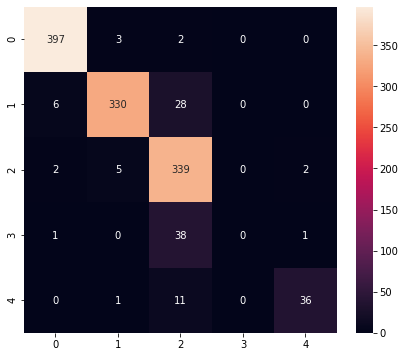

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       402
           1       0.97      0.91      0.94       364
           2       0.81      0.97      0.89       348
           3       0.00      0.00      0.00        40
           4       0.92      0.75      0.83        48

    accuracy                           0.92      1202
   macro avg       0.74      0.72      0.73      1202
weighted avg       0.89      0.92      0.90      1202



/Users/suhyeonyoo/opt/anaconda3/envs/gesture/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suhyeonyoo/opt/anaconda3/envs/gesture/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suhyeonyoo/opt/anaconda3/envs/gesture/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/sp/2t1914v93yb49zbkfxghzhdw0000gn/T/tmp_lmh068z/assets


6400

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 150 µs, sys: 60 µs, total: 210 µs
Wall time: 178 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.2540443e-01 7.3449008e-02 1.1388668e-03 7.6424385e-06 2.0943214e-10]
0
